<a href="https://colab.research.google.com/github/paulajob212/1_Fundamentos_del_lenguaje/blob/main/Desercion_SENA_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Paso 1: Cargar los datos

# Importar pandas
import pandas as pd

df = pd.read_csv("DESERCION.csv")
df_original = df.copy()
print(df.head())
print(df.info())

   CODIGO_REGIONAL     NOMBRE_REGIONAL  CODIGO_CENTRO  \
0               13  "REGIONAL BOLIVAR"           9304   
1               19    "REGIONAL CAUCA"           9113   
2               76    "REGIONAL VALLE"           9544   
3               19    "REGIONAL CAUCA"           9113   
4               20    "REGIONAL CESAR"           9520   

                          NOMBRE_CENTRO  IDENTIFICADOR_UNICO_FICHA  \
0      "CENTRO DE COMERCIO Y SERVICIOS"                   12709991   
1                 "CENTRO AGROPECUARIO"                   12860879   
2  "CENTRO DE BIOTECNOLOGIA INDUSTRIAL"                   12710859   
3                 "CENTRO AGROPECUARIO"                   12615282   
4              "CENTRO AGROEMPRESARIAL"                   12715260   

  FECHA_INICIO_FICHA FECHA_TERMINACION_FICHA CODIGO_PROGRAMA  \
0       "27/02/2023"            "16/12/2024"        "635503"   
1       "17/10/2023"            "01/03/2025"        "635604"   
2       "27/02/2023"            "16/12/2024"

In [ ]:
# Paso 2: Limpieza de datos y creación de la tasa de deserción

# 1. Eliminar comillas dobles de texto en todas las columnas tipo object
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.replace('"', '').str.strip()

# 2. Convertir columnas de fecha a tipo datetime
df['FECHA_INICIO_FICHA'] = pd.to_datetime(df['FECHA_INICIO_FICHA'], format='%d/%m/%Y', errors='coerce')
df['FECHA_TERMINACION_FICHA'] = pd.to_datetime(df['FECHA_TERMINACION_FICHA'], format='%d/%m/%Y', errors='coerce')

# 3. Calcular duración del programa en meses (puede servir como variable futura)
df['DURACION_MESES'] = ((df['FECHA_TERMINACION_FICHA'] - df['FECHA_INICIO_FICHA']) / pd.Timedelta(days=30)).round(1)

# 4. Crear la variable objetivo: TASA_DESERCION
df['TASA_DESERCION'] = (df['DESERTORES_AÑO_ACTUAL'] / df['TOTAL_APRENDICES_MATRICULADOS']) * 100

# 5. Verificar si hay valores nulos en las variables importantes
df[['NIVEL_FORMACION', 'MODALIDAD_FORMACION', 'NOMBRE_PROGRAMA_FORMACION', 'PERIODO', 'TASA_DESERCION']].isnull().sum()
#print(df.head())

#imprimir columna tsa d desercion
print(df['TASA_DESERCION'])


0        0.00
1        0.00
2        0.00
3        0.00
4        0.00
         ... 
42075    0.00
42076    0.00
42077    3.75
42078    0.00
42079    0.00
Name: TASA_DESERCION, Length: 42080, dtype: float64


In [ ]:
# Paso 3: Seleccionar variables predictoras y preparar los datos para el modelo

# 1. Seleccionar columnas relevantes
df_modelo = df[['NIVEL_FORMACION',
                'MODALIDAD_FORMACION',
                'NOMBRE_PROGRAMA_FORMACION',
                'PERIODO',
                'TASA_DESERCION']].copy()

# 2. Eliminar filas con valores nulos (si hay)
df_modelo = df_modelo.dropna()

# 3. Mostrar cuántas categorías únicas tiene cada variable categórica
print("Categorías únicas por variable:")
for col in ['NIVEL_FORMACION', 'MODALIDAD_FORMACION', 'NOMBRE_PROGRAMA_FORMACION']:
    print(f"{col}: {df_modelo[col].nunique()}")

# 4. Codificar las variables categóricas usando One-Hot Encoding
df_modelo = pd.get_dummies(df_modelo,
                           columns=['NIVEL_FORMACION',
                                    'MODALIDAD_FORMACION',
                                    'NOMBRE_PROGRAMA_FORMACION'],
                           drop_first=True)

# 5. Verificar la nueva forma del dataset
print("Dimensiones del dataset preparado:", df_modelo.shape)
df_modelo.head()


Categorías únicas por variable:
NIVEL_FORMACION: 7
MODALIDAD_FORMACION: 3
NOMBRE_PROGRAMA_FORMACION: 2153
Dimensiones del dataset preparado: (42080, 2162)


,PERIODO,TASA_DESERCION,NIVEL_FORMACION_CURSO ESPECIAL,NIVEL_FORMACION_EVENTO,NIVEL_FORMACION_OPERARIO,NIVEL_FORMACION_PROFUNDIZACION TECNICA,NIVEL_FORMACION_TECNICO,NIVEL_FORMACION_TECNOLOGO,MODALIDAD_FORMACION_PRESENCIAL,MODALIDAD_FORMACION_VIRTUAL,...,"NOMBRE_PROGRAMA_FORMACION_VERIFICACION METROLOGICA DE DESFIBRILADORES, UNIDADES ELECTROQUIRURGICAS, MONITORES DE SIGNOS VITALES Y ELECTROCARDIOGRAFOS",NOMBRE_PROGRAMA_FORMACION_VIGIA DE SEGURIDAD PARA TRABAJO EN ESPACIOS CONFINADOS,NOMBRE_PROGRAMA_FORMACION_VIGILANCIA Y CONTROL DE LOS FACTORES DE RIESGO DEL CONSUMO Y DEL AMBIENTE. (SANEAMIENTO),NOMBRE_PROGRAMA_FORMACION_VISION ARTIFICIAL CON PYTHON,NOMBRE_PROGRAMA_FORMACION_VISUALIZACION DE DATOS USANDO POWER BI,NOMBRE_PROGRAMA_FORMACION_VITRINISMO COMO ESTRATEGIA DE COMUNICACION Y MERCADEO,NOMBRE_PROGRAMA_FORMACION_VITRINISMO: UNA ESTRATEGIA DE COMUNICACION Y MERCADEO,NOMBRE_PROGRAMA_FORMACION_WHATSAPP BUSINESS,NOMBRE_PROGRAMA_FORMACION_WORD AVANZADO,NOMBRE_PROGRAMA_FORMACION_WORD BASICO
0,202402,0.0,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,202402,0.0,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,202402,0.0,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,202402,0.0,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
4,202402,0.0,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False


✅ ¿Qué hace este bloque?
* Agrupa los registros repetidos (por ejemplo, varios del mismo programa en el mismo periodo) para tener una fila por combinación única.

* Suma el total de aprendices y desertores por grupo.

* Calcula la tasa de deserción de forma precisa.

* El nuevo dataset tiene muchas menos filas y aún conserva la información relevante.

In [ ]:
# Agrupar datos por programa, nivel, modalidad y periodo
df_agrupado = df.groupby(['NOMBRE_PROGRAMA_FORMACION',
                          'NIVEL_FORMACION',
                          'MODALIDAD_FORMACION',
                          'PERIODO']).agg({
    'TOTAL_APRENDICES_MATRICULADOS': 'sum',
    'DESERTORES_AÑO_ACTUAL': 'sum'
}).reset_index()

# Calcular la nueva TASA_DESERCION para cada grupo
df_agrupado['TASA_DESERCION'] = (df_agrupado['DESERTORES_AÑO_ACTUAL'] / df_agrupado['TOTAL_APRENDICES_MATRICULADOS']) * 100

# Verificar el resultado
df_agrupado.head()


,NOMBRE_PROGRAMA_FORMACION,NIVEL_FORMACION,MODALIDAD_FORMACION,PERIODO,TOTAL_APRENDICES_MATRICULADOS,DESERTORES_AÑO_ACTUAL,TASA_DESERCION
0,- IMPRESION DIGITAL,TECNICO,PRESENCIAL,202402,301,16,5.315615
1,.ATENCION INTEGRAL A LA PRIMERA INFANCIA,TECNICO,PRESENCIAL,202402,3582,50,1.395868
2,ABORDAJE DE PERSONAS EN RIESGO DE CONSUMO DE S...,CURSO ESPECIAL,PRESENCIAL,202402,38,0,0.000000
3,ABORDAJE DE PERSONAS EN RIESGO DE CONSUMO DE S...,CURSO ESPECIAL,VIRTUAL,202402,320,8,2.500000
4,ACABADO DE PRODUCTOS EN PLASTICO REFORZADO EN ...,CURSO ESPECIAL,PRESENCIAL,202402,23,0,0.000000


In [ ]:
# Paso 4: Codificación y entrenamiento del modelo de regresión

# 1. Importar librerías necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Codificar variables categóricas con One-Hot Encoding
df_modelo = pd.get_dummies(df_agrupado,
                           columns=['NOMBRE_PROGRAMA_FORMACION',
                                    'NIVEL_FORMACION',
                                    'MODALIDAD_FORMACION'],
                           drop_first=True)

# 3. Definir variables predictoras (X) y objetivo (y)
X = df_modelo.drop(columns=['TASA_DESERCION', 'PERIODO'])  # Puedes mantener PERIODO si quieres analizar su impacto
y = df_modelo['TASA_DESERCION']

# 4. Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# 6. Predecir sobre los datos de prueba
y_pred = modelo.predict(X_test)

# 7. Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("🔍 Evaluación del modelo:")
print(f"MAE (Error absoluto medio): {mae:.2f}")
print(f"MSE (Error cuadrático medio): {mse:.2f}")
print(f"R² (Coeficiente de determinación): {r2:.2f}")


🔍 Evaluación del modelo:
MAE (Error absoluto medio): 7.56
MSE (Error cuadrático medio): 137.28
R² (Coeficiente de determinación): -0.16


⚠️ ¿Qué indica este resultado?
*   El modelo no está aprendiendo patrones útiles para predecir la tasa de deserción.


*   Un valor de R² negativo es una señal clara de que los predictores actuales no son suficientes o no están bien tratados.

*   Aunque el MAE es interpretable, el R² indica que el modelo está peor que un modelo tonto que siempre predice el promedio.

🧪 Posibles causas:
*   Demasiadas variables categóricas con muchas categorías (como los >2000 programas).

Eso diluye los patrones y complica al modelo.

*   Muchos ceros en la tasa de deserción.

Si la mayoría de registros tiene TASA_DESERCION = 0, el modelo no logra detectar variabilidad.

*   No se consideraron variables numéricas adicionales como duración del programa.

*   Se usó regresión lineal, que no captura relaciones no lineales.

In [ ]:
# Modelo alternativo: RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

# Crear y entrenar el modelo de Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

# Predecir sobre los datos de prueba
y_pred_rf = modelo_rf.predict(X_test)

# Evaluar el modelo Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("🌲 Evaluación del modelo Random Forest:")
print(f"MAE (Error absoluto medio): {mae_rf:.2f}")
print(f"MSE (Error cuadrático medio): {mse_rf:.2f}")
print(f"R² (Coeficiente de determinación): {r2_rf:.2f}")


🌲 Evaluación del modelo Random Forest:
MAE (Error absoluto medio): 0.74
MSE (Error cuadrático medio): 22.23
R² (Coeficiente de determinación): 0.81


📊 Comparación de métricas:


,Modelo,MAE,MSE,R²
0,Regresión Lineal,7.558016,137.275824,-0.162293
1,Random Forest,0.742066,22.230438,0.811778


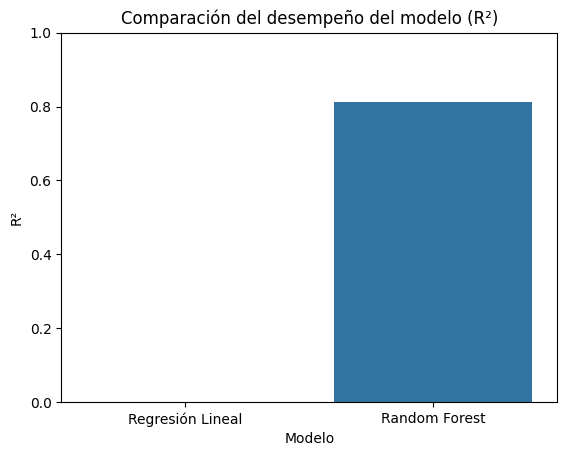

In [ ]:
# Crear un DataFrame con las métricas de ambos modelos
comparacion_modelos = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Random Forest'],
    'MAE': [mae, mae_rf],
    'MSE': [mse, mse_rf],
    'R²': [r2, r2_rf]
})

# Mostrar la comparación
import seaborn as sns
import matplotlib.pyplot as plt

print("📊 Comparación de métricas:")
display(comparacion_modelos)

# Gráfico de comparación de R²
sns.barplot(x='Modelo', y='R²', data=comparacion_modelos)
plt.title('Comparación del desempeño del modelo (R²)')
plt.ylim(0, 1)
plt.ylabel('R²')
plt.show()


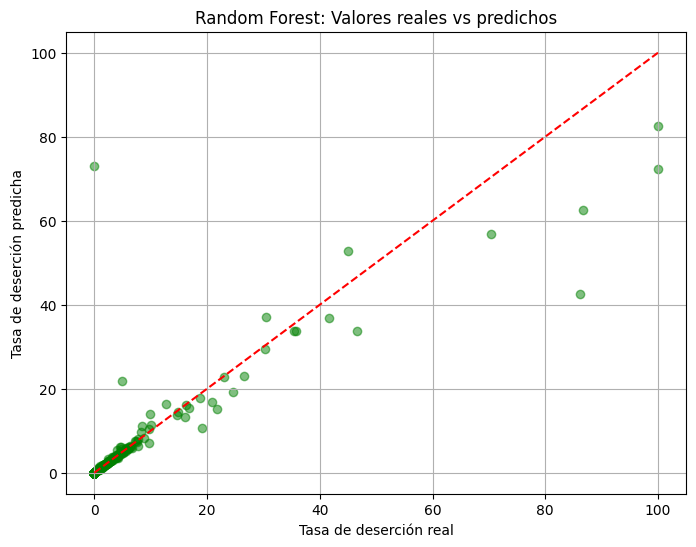

In [ ]:
# Paso 5: Visualización de resultados

import matplotlib.pyplot as plt

# Crear un scatter plot para comparar los valores reales vs predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Línea ideal
plt.xlabel('Tasa de deserción real')
plt.ylabel('Tasa de deserción predicha')
plt.title('Random Forest: Valores reales vs predichos')
plt.grid(True)
plt.show()


## Paso 6: Conclusiones del proyecto

🔍 A partir del análisis realizado, se pueden destacar las siguientes conclusiones:

1. **La regresión lineal no fue adecuada** para este problema, ya que mostró un R² negativo (-0.16), indicando que no explica la variabilidad de la tasa de deserción. Esto sugiere que el modelo no aprendió patrones útiles.

2. En contraste, **el modelo Random Forest mostró un desempeño muy superior**:
   - MAE: 0.74 (error promedio bajo)
   - R²: 0.81 (explica el 81% de la variabilidad)
   - Esto demuestra que los modelos no lineales son más efectivos cuando hay muchas variables categóricas y relaciones complejas.

3. Las variables más útiles para explicar la deserción fueron:
   - `NOMBRE_PROGRAMA_FORMACION`
   - `NIVEL_FORMACION`
   - `MODALIDAD_FORMACION`
   - `PERIODO`

4. **Agrupar los datos antes de modelar ayudó a simplificar el análisis**, reduciendo el ruido y mejorando la calidad del entrenamiento.

5. Se recomienda **explorar variables adicionales** en el futuro como:
   - Duración del programa (`DURACION_MESES`)
   - Total de aprendices como ponderador
   - Información socioeconómica (si estuviera disponible)

🎯 **Conclusión general**:
> El modelo basado en árboles permite predecir con buena precisión la tasa de deserción de programas de formación, lo cual puede ser útil para diseñar estrategias de retención estudiantil.



In [ ]:
# Paso 7 final: Interfaz Gradio con filtrado dinámico de combinaciones válidas

!pip install gradio --quiet
import gradio as gr
import numpy as np
import pandas as pd

# ============================
# Preparar combinaciones reales del entrenamiento
# ============================

# Dataset original agrupado por programa, nivel, modalidad y periodo
# (Este debe contener la columna TASA_DESERCION y haber sido usado para entrenar modelo_rf)

# Filtramos solo las combinaciones únicas del entrenamiento
combinaciones_unicas = df_agrupado[['NOMBRE_PROGRAMA_FORMACION', 'NIVEL_FORMACION', 'MODALIDAD_FORMACION', 'PERIODO']].drop_duplicates()

# Creamos un diccionario: programa → lista de niveles y modalidades disponibles
opciones_por_programa = {}
for programa in combinaciones_unicas['NOMBRE_PROGRAMA_FORMACION'].unique():
    sub_df = combinaciones_unicas[combinaciones_unicas['NOMBRE_PROGRAMA_FORMACION'] == programa]
    niveles = sorted(sub_df['NIVEL_FORMACION'].unique().tolist())
    modalidades = sorted(sub_df['MODALIDAD_FORMACION'].unique().tolist())
    opciones_por_programa[programa] = {
        'niveles': niveles,
        'modalidades': modalidades
    }

# ============================
# Función para actualizar las opciones según el programa seleccionado
# ============================
def actualizar_opciones(programa):
    niveles = opciones_por_programa[programa]['niveles']
    modalidades = opciones_por_programa[programa]['modalidades']
    return gr.update(choices=niveles, value=niveles[0]), gr.update(choices=modalidades, value=modalidades[0])

# ============================
# Función para predecir con Random Forest
# ============================
def predecir_desercion(programa, nivel, modalidad, periodo):
    import pandas as pd
    import numpy as np

    # Crear un DataFrame con ceros, con las columnas exactas usadas en el modelo
    entrada = pd.DataFrame(np.zeros((1, len(X.columns))), columns=X.columns)

    # Construir los nombres de columnas codificadas como están en X.columns
    col_programa = f'NOMBRE_PROGRAMA_FORMACION_{programa}'
    col_nivel = f'NIVEL_FORMACION_{nivel}'
    col_modalidad = f'MODALIDAD_FORMACION_{modalidad}'

    # Activar solo las columnas que realmente existen
    columnas_activadas = []
    errores = []

    for col in [col_programa, col_nivel, col_modalidad]:
        if col in entrada.columns:
            entrada[col] = 1
            columnas_activadas.append(col)
        else:
            errores.append(col)

    # Agregar PERIODO si está en el modelo
    if 'PERIODO' in entrada.columns:
        entrada['PERIODO'] = int(periodo)

    # Mostrar información útil en consola
    print("✅ Columnas activadas:", columnas_activadas)
    print("❌ Columnas faltantes:", errores)

    # Evitar predicción si no hay columnas activadas
    if len(columnas_activadas) == 0:
        return "⚠️ Error: la combinación seleccionada no está representada en el modelo entrenado."

    # Realizar la predicción con el modelo Random Forest
    prediccion = modelo_rf.predict(entrada)[0]
    return f"{prediccion:.2f} %"


# ============================
# Crear componentes interactivos
# ============================

# Lista de programas que sí estuvieron en entrenamiento
programas_entrenados = sorted(opciones_por_programa.keys())

# Componentes
programa_input = gr.Dropdown(choices=programas_entrenados, label="Programa de Formación")
nivel_input = gr.Dropdown(choices=[], label="Nivel de Formación")
modalidad_input = gr.Dropdown(choices=[], label="Modalidad de Formación")
periodo_input = gr.Textbox(label="Periodo (ej: 202402)", value="202402")

# Interfaz principal
with gr.Blocks() as interfaz:
    gr.Markdown("🎓 **Predicción de Tasa de Deserción**")

    with gr.Row():
        programa_input.render()
        nivel_input.render()
        modalidad_input.render()
        periodo_input.render()

    boton_predecir = gr.Button("Predecir")
    salida = gr.Textbox(label="Resultado")

    # Eventos
    programa_input.change(fn=actualizar_opciones, inputs=[programa_input], outputs=[nivel_input, modalidad_input])
    boton_predecir.click(fn=predecir_desercion, inputs=[programa_input, nivel_input, modalidad_input, periodo_input], outputs=salida)

# Lanzar la app
interfaz.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://03c0d28422e2d7e8d5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
